## Data aggregation

Goal: create 1 dataset with relevant synthesis parameters and measurement outcomes for everything I've made

Columns in output: UUID, volume fractions of everything, fit results processed with Null if version wasn't best

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

## Load synthesis files

In [3]:
synthesis_files = ['/home/bgpelkie/Code/silica-np-synthesis/2024_10_04_RandomBaseline_v2/Sample_table_2024_10_04_randomsampleV2.csv', 
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_10_07_randomSampleV3/Sample_table_2024_10_07_randomsampleV3.csv', 
                   #'/home/bgpelkie/Code/silica-np-synthesis/2024_10_14_highlights_replicates/2024_10_14_highlights_replicates_sampletable.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_10_17_RandomBaselineV4/Sample_table_2024_10_17_RandomBaselineV4.csv']
                   #'/home/bgpelkie/Code/silica-np-synthesis/2024_11_04_OptimizationRound1/SampleTable_2024_11_04_OptimizationRound1.csv',
                   #'/home/bgpelkie/Code/silica-np-synthesis/2024_11_11_OptimizationRound2/SampleTable_2024_11_11_OptimizationRound2.csv',
                   #'/home/bgpelkie/Code/silica-np-synthesis/2024_11_14_OptimRound3/SampleTable_2024_11_14_OptimizationRound3.csv'] 

In [4]:
fp2name = {'/home/bgpelkie/Code/silica-np-synthesis/2024_10_07_randomSampleV3/Sample_table_2024_10_07_randomsampleV3.csv':'2024_10_07_randomSampleV3', 
           '/home/bgpelkie/Code/silica-np-synthesis/2024_10_04_RandomBaseline_v2/Sample_table_2024_10_04_randomsampleV2.csv':'2024_10_04_RandomBaseline_v2', 
           '/home/bgpelkie/Code/silica-np-synthesis/2024_10_17_RandomBaselineV4/Sample_table_2024_10_17_RandomBaselineV4.csv':'2024_10_17_RandomBaselineV4',
          }



In [5]:
synth_tables = []
count = 0
for fp in synthesis_files:
    data= pd.read_csv(fp)
    name = fp2name[fp]
    data['campaign'] = [name]*len(data)
    synth_tables.append(data)
    count += len(data)
    

synth_table = pd.concat(synth_tables, axis = 0)

In [6]:
synth_table

,Unnamed: 0,uuid,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,ethanol_dilute_vol,sample_dilute_vol
0,0,4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,A1,2024_10_04_RandomBaseline_v2,NaN,NaN
1,1,a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,A2,2024_10_04_RandomBaseline_v2,NaN,NaN
2,2,3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,A3,2024_10_04_RandomBaseline_v2,NaN,NaN
3,3,0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,A4,2024_10_04_RandomBaseline_v2,NaN,NaN
4,4,68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,A5,2024_10_04_RandomBaseline_v2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,35,49908a7b-72dd-4050-aab5-05b2807f82f8,60.410553,94.258186,21.613657,1523.717603,0.452263,9.564710,0.011908,E8,2024_10_17_RandomBaselineV4,931.0,769.0
36,36,5dca1867-c2bf-4e16-893b-57ec828b4951,94.733145,141.702552,95.777438,1367.786865,0.288404,14.998954,0.018328,F1,2024_10_17_RandomBaselineV4,1210.0,490.0
37,37,21ae2275-1852-4a8d-b2dc-6ec0b850491a,83.552676,104.173866,91.429381,1420.844077,0.326996,13.228767,0.016243,F2,2024_10_17_RandomBaselineV4,1144.0,556.0
38,38,d112b2bd-0447-459e-b875-15fb7e52b51f,113.713415,66.366096,222.160905,1297.759584,0.240266,18.004071,0.021676,F3,2024_10_17_RandomBaselineV4,1292.0,408.0


In [7]:
synth_table = synth_table.drop(['Unnamed: 0'], axis = 1)
synth_table = synth_table.drop(['well', 'ethanol_dilute_vol', 'sample_dilute_vol'], axis = 1)

In [8]:
synth_table = synth_table.set_index('uuid')

In [9]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign
uuid,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2
...,...,...,...,...,...,...,...,...
49908a7b-72dd-4050-aab5-05b2807f82f8,60.410553,94.258186,21.613657,1523.717603,0.452263,9.564710,0.011908,2024_10_17_RandomBaselineV4
5dca1867-c2bf-4e16-893b-57ec828b4951,94.733145,141.702552,95.777438,1367.786865,0.288404,14.998954,0.018328,2024_10_17_RandomBaselineV4
21ae2275-1852-4a8d-b2dc-6ec0b850491a,83.552676,104.173866,91.429381,1420.844077,0.326996,13.228767,0.016243,2024_10_17_RandomBaselineV4


## Get volume fractions

In [10]:
def target_vol(row):
    target_vol = row['teos_volume'] + row['ammonia_volume'] + row['water_volume'] + row['ethanol_volume']
    return target_vol
    

In [11]:
synth_table['target_volume'] = synth_table.apply(target_vol, axis=1)

In [12]:
synth_table['teos_vol_frac'] = synth_table['teos_volume']/synth_table['target_volume']
synth_table['ammonia_vol_frac'] = synth_table['ammonia_volume']/synth_table['target_volume']
synth_table['water_vol_frac'] = synth_table['water_volume']/synth_table['target_volume']
synth_table['ethanol_vol_frac'] = synth_table['ethanol_volume']/synth_table['target_volume']

In [13]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac
uuid,,,,,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,1700.0,0.029542,0.073083,0.097024,0.800351
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,1700.0,0.098180,0.062087,0.048724,0.791009
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,1700.0,0.049105,0.033951,0.103001,0.813944
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,1700.0,0.112022,0.061094,0.082243,0.744642
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,1700.0,0.044250,0.100538,0.110330,0.744882
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49908a7b-72dd-4050-aab5-05b2807f82f8,60.410553,94.258186,21.613657,1523.717603,0.452263,9.564710,0.011908,2024_10_17_RandomBaselineV4,1700.0,0.035536,0.055446,0.012714,0.896304
5dca1867-c2bf-4e16-893b-57ec828b4951,94.733145,141.702552,95.777438,1367.786865,0.288404,14.998954,0.018328,2024_10_17_RandomBaselineV4,1700.0,0.055725,0.083354,0.056340,0.804581
21ae2275-1852-4a8d-b2dc-6ec0b850491a,83.552676,104.173866,91.429381,1420.844077,0.326996,13.228767,0.016243,2024_10_17_RandomBaselineV4,1700.0,0.049149,0.061279,0.053782,0.835791


In [14]:
#synth_table.to_csv('synth_table_master_11_11_24.csv')

## Load distance file

In [15]:
distance_results = pd.read_csv('distance_results_comparisonOpt_randomsetup.csv')

In [16]:
distance_results = distance_results.set_index('uuid')

In [17]:
distance_results

,Unnamed: 0,amplitude_distance,phase_distance,sum_ap_distance,raw_rmse_distance,sphere_diameter_nm,sphere_pdi,processes_status
uuid,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,0,0.746509,0.546916,1.293424,0.263329,73.262381,1.000000,success
a180d359-a229-4b3e-a615-2991fd549f42,1,0.801114,0.543067,1.344181,0.261322,100.922977,0.722970,success
3584700a-8b01-4e59-a53a-1300fd3fac0a,2,0.866996,0.549924,1.416920,0.258173,96.631829,0.704364,success
0e6edb88-77c3-4984-a38d-198341bba9e1,3,0.840929,0.578464,1.419393,0.271926,93.463489,0.718000,success
68831f53-4a51-4f12-b385-10c50c8fab46,4,0.985176,0.528511,1.513687,0.267274,94.828557,0.695253,success
...,...,...,...,...,...,...,...,...
8a0bd2de-3c21-4148-b402-efebe0043e63,79,1.012908,0.496771,1.509679,0.259448,103.617138,0.751342,success
e0ec3c4c-a1d6-4cbc-8c5c-3ed0b7a0f7eb,80,0.949532,0.511443,1.460975,0.269177,104.840217,0.739038,success
b59dad1a-4440-453a-b36a-9efd6e49a282,81,1.034467,0.508700,1.543167,0.266579,97.631181,0.713813,success


In [18]:
distance_list = []
rmse_list = []
experiment_status = []

for uuid_val in synth_table.index:
    print(uuid_val)
    try:
        row = distance_results.loc[uuid_val]
    except KeyError:
        distance_list.append(None)
        rmse_list.append(None)
        experiment_status.append('incomplete')
        continue

    if row['processes_status'] == 'failed':
        distance_list.append(distance_results['sum_ap_distance'].max())
        rmse_list.append(distance_results['raw_rmse_distance'].max())
        experiment_status.append('complete')
    if row['processes_status'] == 'success':
        distance_list.append(row['sum_ap_distance'])
        rmse_list.append(row['raw_rmse_distance'])
        experiment_status.append('complete')
        


4bec4e18-80bb-44d9-8508-cc464f14b287
a180d359-a229-4b3e-a615-2991fd549f42
3584700a-8b01-4e59-a53a-1300fd3fac0a
0e6edb88-77c3-4984-a38d-198341bba9e1
68831f53-4a51-4f12-b385-10c50c8fab46
fed3ab35-04e9-4916-8527-8627191a3bdc
32ec16b1-c5b5-4d8b-b396-cd1ad4b740d9
a4d8a8f6-2654-490f-b14a-02d3fb1f94b2
770a433d-0480-4cee-bf12-ce066c24db55
41414be7-3e27-4b4d-b70e-e31d54a733d3
6b50a94f-b7f2-402e-a210-e89f507b8861
fa1dfc55-e5e0-4514-a66a-e29a5351518a
ef17f542-90a3-44a8-a6b8-acb920953fab
23850c30-c572-41ad-abf0-7e1bd4fa7397
4ab46dcc-3395-4e7b-bb87-52e805e12abb
657e707f-abc9-4f86-ae1e-9e59efb6e1f9
96ef6012-d812-4975-8b77-8ed7e78669fb
e0368e49-ecc3-4ebf-9a19-4e942c829517
d03dab18-5712-44f7-9334-14047212632e
4d5fd07b-987b-49df-b4ba-54d2a337d945
6abcfcc8-cf8d-4a5e-a92f-f3afd8023fbd
8559907a-1b27-4673-ae0e-602b83d86deb
b683d769-9cd7-454a-b546-4e86afe5e3f4
a6974af8-5b2d-431a-94df-d35c0be3ee54
81f8f6c2-0e42-4680-bc11-c0be02bfd641
f5e32498-0689-4e74-9a45-9c17edf776b9
1c809d50-4605-4865-aa13-13649203ede8
f

In [19]:
synth_table['ap_distance'] = distance_list
synth_table['rmse_distance'] = rmse_list
synth_table['experiment_status'] = experiment_status

In [20]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status
uuid,,,,,,,,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,1700.0,0.029542,0.073083,0.097024,0.800351,1.293424,0.263329,complete
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,1700.0,0.098180,0.062087,0.048724,0.791009,1.344181,0.261322,complete
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,1700.0,0.049105,0.033951,0.103001,0.813944,1.416920,0.258173,complete
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,1700.0,0.112022,0.061094,0.082243,0.744642,1.419393,0.271926,complete
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,1700.0,0.044250,0.100538,0.110330,0.744882,1.513687,0.267274,complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49908a7b-72dd-4050-aab5-05b2807f82f8,60.410553,94.258186,21.613657,1523.717603,0.452263,9.564710,0.011908,2024_10_17_RandomBaselineV4,1700.0,0.035536,0.055446,0.012714,0.896304,NaN,NaN,incomplete
5dca1867-c2bf-4e16-893b-57ec828b4951,94.733145,141.702552,95.777438,1367.786865,0.288404,14.998954,0.018328,2024_10_17_RandomBaselineV4,1700.0,0.055725,0.083354,0.056340,0.804581,NaN,NaN,incomplete
21ae2275-1852-4a8d-b2dc-6ec0b850491a,83.552676,104.173866,91.429381,1420.844077,0.326996,13.228767,0.016243,2024_10_17_RandomBaselineV4,1700.0,0.049149,0.061279,0.053782,0.835791,NaN,NaN,incomplete


In [35]:
synth_table.to_csv('synth_table_both_distances_80nmtarget_12_16_24.csv')

In [22]:
synth_table['rank'] = rank = synth_table['ap_distance'].rank()

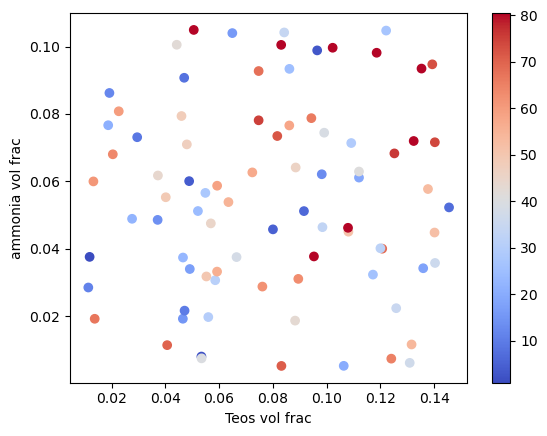

In [23]:
fig, ax = plt.subplots()

sc = ax.scatter(synth_table['teos_vol_frac'], synth_table['ammonia_vol_frac'], c = synth_table['rank'], cmap = plt.cm.coolwarm)
ax.set_xlabel('Teos vol frac')
ax.set_ylabel('ammonia vol frac')
cbar = fig.colorbar(sc, ax = ax)

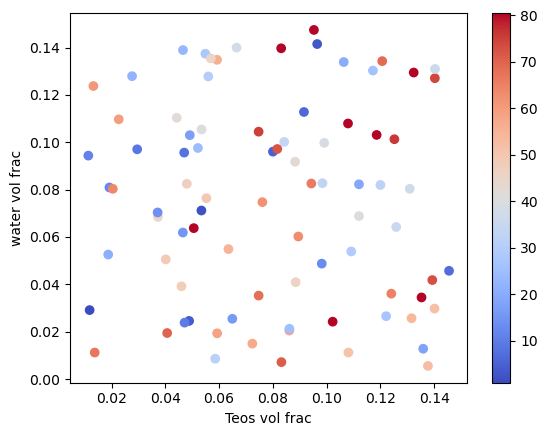

In [24]:
fig, ax = plt.subplots()

sc = ax.scatter(synth_table['teos_vol_frac'], synth_table['water_vol_frac'], c = synth_table['rank'], cmap = plt.cm.coolwarm)
ax.set_xlabel('Teos vol frac')
ax.set_ylabel('water vol frac')
cbar = fig.colorbar(sc, ax = ax)

In [25]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status,rank
uuid,,,,,,,,,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,1700.0,0.029542,0.073083,0.097024,0.800351,1.293424,0.263329,complete,9.0
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,1700.0,0.098180,0.062087,0.048724,0.791009,1.344181,0.261322,complete,13.0
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,1700.0,0.049105,0.033951,0.103001,0.813944,1.416920,0.258173,complete,17.0
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,1700.0,0.112022,0.061094,0.082243,0.744642,1.419393,0.271926,complete,19.0
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,1700.0,0.044250,0.100538,0.110330,0.744882,1.513687,0.267274,complete,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49908a7b-72dd-4050-aab5-05b2807f82f8,60.410553,94.258186,21.613657,1523.717603,0.452263,9.564710,0.011908,2024_10_17_RandomBaselineV4,1700.0,0.035536,0.055446,0.012714,0.896304,NaN,NaN,incomplete,NaN
5dca1867-c2bf-4e16-893b-57ec828b4951,94.733145,141.702552,95.777438,1367.786865,0.288404,14.998954,0.018328,2024_10_17_RandomBaselineV4,1700.0,0.055725,0.083354,0.056340,0.804581,NaN,NaN,incomplete,NaN
21ae2275-1852-4a8d-b2dc-6ec0b850491a,83.552676,104.173866,91.429381,1420.844077,0.326996,13.228767,0.016243,2024_10_17_RandomBaselineV4,1700.0,0.049149,0.061279,0.053782,0.835791,NaN,NaN,incomplete,NaN


In [26]:

name_bounds = {}
for name in fp2name.values():
    name_bounds[name] = []
    count = 0
    for i, row in synth_table.iterrows():
        bounds = []
        if row['campaign'] == name:
            name_bounds[name].append(count)
        count += 1
        

In [27]:
best_distances = []
for i, row in synth_table.iterrows():
    dist = row['ap_distance']
    if len(best_distances) == 0:
        best_distances.append(dist)
    else:
        best_distances.append(min(best_distances[-1], dist))

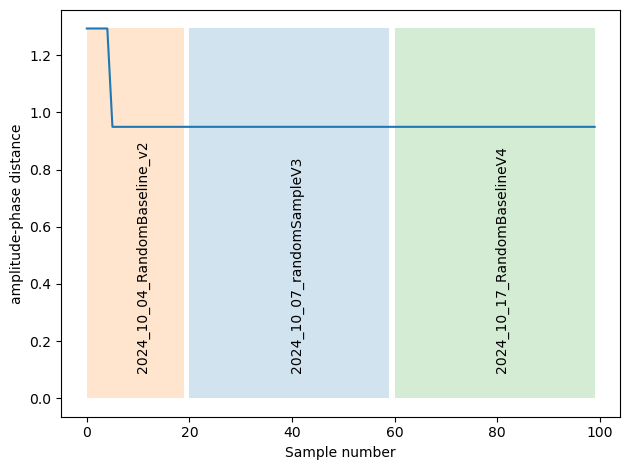

In [28]:
fig, ax = plt.subplots()

for name, bounds in name_bounds.items():
    ax.fill_between(bounds, 0, max(best_distances), alpha = 0.2)
    ax.text(np.mean(bounds), 0.1, name, rotation = 'vertical')
ax.plot(best_distances)


ax.set_xlabel('Sample number')
ax.set_ylabel('amplitude-phase distance')

plt.tight_layout()
plt.savefig('Campaign_convergence_plot.png', dpi = 300)

In [29]:
np.mean(bounds)

np.float64(79.5)

In [30]:
## best for campaign plot

name_distances = {}
for name in fp2name.values():
    name_distances[name] = []
    count = 0
    for i, row in synth_table.iterrows():
        bounds = []
        if row['campaign'] == name:
            name_distances[name].append(row['ap_distance'])
        count += 1

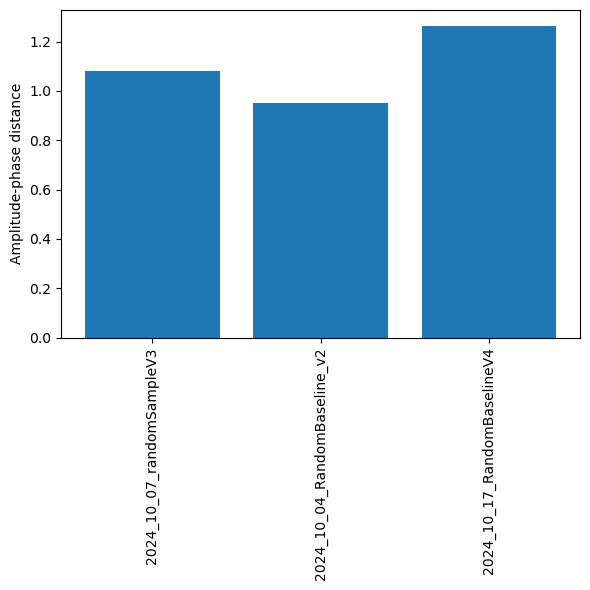

In [31]:
fig, ax = plt.subplots(figsize = (6,6))
name_distances_max = [min(distances) for distances in name_distances.values()]
ax.bar(name_distances.keys(), name_distances_max)
ax.tick_params(axis = 'x', rotation = 90)
ax.set_ylabel('Amplitude-phase distance')

plt.tight_layout()

plt.savefig('best_per_campaign.png', dpi = 300)

In [34]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status,rank
uuid,,,,,,,,,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,1700.0,0.029542,0.073083,0.097024,0.800351,1.293424,0.263329,complete,9.0
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,1700.0,0.098180,0.062087,0.048724,0.791009,1.344181,0.261322,complete,13.0
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,1700.0,0.049105,0.033951,0.103001,0.813944,1.416920,0.258173,complete,17.0
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,1700.0,0.112022,0.061094,0.082243,0.744642,1.419393,0.271926,complete,19.0
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,1700.0,0.044250,0.100538,0.110330,0.744882,1.513687,0.267274,complete,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49908a7b-72dd-4050-aab5-05b2807f82f8,60.410553,94.258186,21.613657,1523.717603,0.452263,9.564710,0.011908,2024_10_17_RandomBaselineV4,1700.0,0.035536,0.055446,0.012714,0.896304,NaN,NaN,incomplete,NaN
5dca1867-c2bf-4e16-893b-57ec828b4951,94.733145,141.702552,95.777438,1367.786865,0.288404,14.998954,0.018328,2024_10_17_RandomBaselineV4,1700.0,0.055725,0.083354,0.056340,0.804581,NaN,NaN,incomplete,NaN
21ae2275-1852-4a8d-b2dc-6ec0b850491a,83.552676,104.173866,91.429381,1420.844077,0.326996,13.228767,0.016243,2024_10_17_RandomBaselineV4,1700.0,0.049149,0.061279,0.053782,0.835791,NaN,NaN,incomplete,NaN
